In [1]:
import numpy as np

def generate_points_in_sphere(n_points, radius=1000):
    """
    Generate n_points uniformly distributed within a cube [-radius, radius] and discard points outside the sphere.

    Args:
    - n_points: Number of points to generate.
    - radius: Radius of the sphere within which points are kept.

    Returns:
    - A numpy array of shape (n_points, 3) with (x, y, z) coordinates inside the sphere.
    """
    points = []
    while len(points) < n_points:
        # Generate random points in the cube [-radius, radius] for x, y, z
        x = np.random.uniform(-radius, radius, n_points)
        y = np.random.uniform(-radius, radius, n_points)
        z = np.random.uniform(-radius, radius, n_points)

        # Compute distance from the origin for each point
        distances = np.sqrt(x**2 + y**2 + z**2)

        # Keep only the points within the sphere of the given radius
        inside_sphere = distances <= radius
        valid_points = np.vstack((x[inside_sphere], y[inside_sphere], z[inside_sphere])).T

        # Add valid points to the result list
        points.extend(valid_points)

        # Adjust the number of points to generate again, only if needed
        n_points -= len(valid_points)

    # Convert the list to a numpy array and return the result
    return np.array(points)

# Example usage
if __name__ == "__main__":
    n_points = 10000  # Number of points to generate
    radius = 1000  # Radius of the sphere
    points = generate_points_in_sphere(n_points, radius)

    # Output the first few points
    print(points[:5])  # Print the first 5 points (x, y, z)


[[ 201.11725949  576.83381078  760.1647922 ]
 [ 208.43570361 -185.95410996  751.18605691]
 [ 624.26139905  -19.27075306   68.18145562]
 [-136.56322307 -899.77045379 -365.25409842]
 [-714.84863755  226.42230879 -413.02083902]]


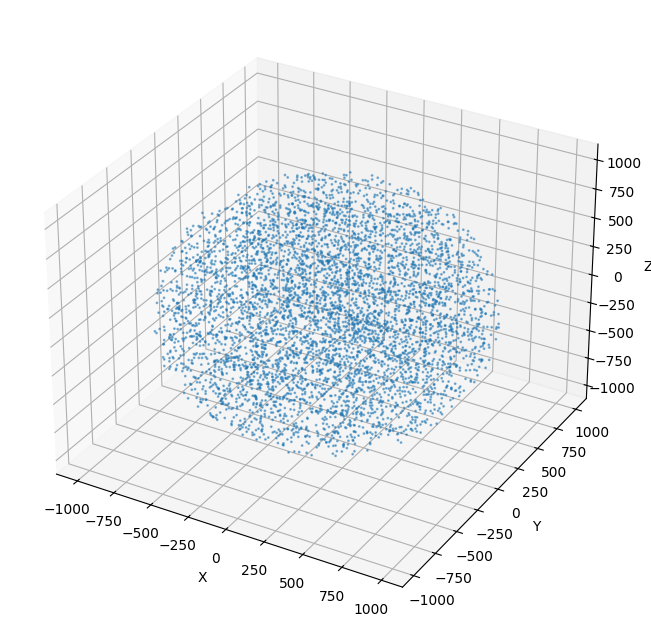

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the 3D point cloud
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
